In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, date
import plotly.express as px
import calendar
import random
import re
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df_grades = pd.read_excel("Exam Stress Final.xlsx","Grades")
df_demography = pd.read_excel("Exam Stress Final.xlsx","Demography")
df_eda = pd.read_excel("Exam Stress Final.xlsx","EDA")
df_hr = pd.read_excel("Exam Stress Final.xlsx","HR")
df_temp = pd.read_excel("Exam Stress Final.xlsx","Temp")
df_ibi = pd.read_excel("Exam Stress Final.xlsx","IBI")

In [4]:
df_eda['Student_id'].replace('S010','S10',inplace = True)
df_hr['Student_id'].replace('S010','S10',inplace = True)
df_temp['Student_id'].replace('S010','S10',inplace = True)
df_ibi['Student_id'].replace('S010','S10',inplace = True)
df_ibi['Student_id'].replace('S010','S10',inplace = True)
df_eda['Exam'].replace('midterm 1','Midterm 1', inplace = True)
df_eda['Exam'].replace('midterm 2','Midterm 2', inplace = True)
df_ibi['Exam'].replace('midterm 1','Midterm 1', inplace = True)
df_ibi['Exam'].replace('midterm 2','Midterm 2', inplace = True)

# Create a new column 'HR_category' based on the quartiles of 'HR' values, where 1 represents the lowest quartile and 4 represents the highest quartile.

In [40]:
df_hr['HR_category'] = pd.qcut(df_hr['HR'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])

df_hr.dropna()

,HR,Time in mins,Student_id,Exam,HR_category
0,119.023,1.0,S01,final,3
1,130.879,2.0,S01,final,4
2,131.586,3.0,S01,final,4
3,109.852,4.0,S01,final,3
4,81.178,5.0,S01,final,1
...,...,...,...,...,...
7367,141.667,212.0,S10,Midterm 2,4
7368,162.584,213.0,S10,Midterm 2,4
7369,171.387,214.0,S10,Midterm 2,4
7370,121.597,215.0,S10,Midterm 2,4


# Find the highest temperature recorded during the 'final' exam

In [5]:
max_temp_final = df_temp[df_temp['Exam'] == 'final']['TEMP'].max()
print(f"The highest temperature recorded during the 'final' exam is: {max_temp_final:.2f}")


The highest temperature recorded during the 'final' exam is: 36.04


# Determine the student with the highest average EDA for all exams

In [15]:
merged_data = pd.merge(df_eda, df_demography, on='Student_id')
highest_avg_EDA_student = merged_data.groupby('Student_id')['EDA'].mean().idxmax()
print(f"The student with the highest average EDA for all exams is: {highest_avg_EDA_student}")

The student with the highest average EDA for all exams is: S04


# Identify the demographic details (DOB, First Name, Last Name) of the student who has the highest average heart rate (HR) across all exams.

In [19]:
merged_data = pd.merge(df_hr, df_demography, on='Student_id')
highest_avg_HR_student = merged_data.groupby('Student_id')['HR'].mean().idxmax()
student_demographics = merged_data.loc[merged_data['Student_id'] == highest_avg_HR_student, ['DOB', 'First Name', 'Last Name']]

print(f"The student with the highest average heart rate is:\n")
student_demographics.drop_duplicates()


The student with the highest average heart rate is:



,DOB,First Name,Last Name
760,2009-02-02,Nora,Jones


#  Calculate the correlation between 'TEMP' and 'HR' for the 'final' exam.

In [20]:
merged_data = pd.merge(df_temp,df_hr, on = ['Student_id','Exam'])
correlation_temp_hr_final = merged_data[merged_data['Exam'] == 'final']['TEMP'].corr(merged_data[merged_data['Exam'] == 'final']['HR'])
print(f"The correlation between 'TEMP' and 'HR' for the 'final' exam is: {correlation_temp_hr_final:.3f}")


The correlation between 'TEMP' and 'HR' for the 'final' exam is: -0.027


# Calculate the standard deviation of the 'TEMP' values for the 'midterm 1

In [22]:
temp_std_dev_midterm1 = df_temp[df_temp['Exam'] == 'Midterm 1']['TEMP'].std()
print(f"The standard deviation of 'TEMP' values for the 'midterm 1' exam is: {temp_std_dev_midterm1:.3f}")

The standard deviation of 'TEMP' values for the 'midterm 1' exam is: 2.985


# Determine the correlation between 'EDA' and 'HR' for female students.

In [28]:
merged_data = pd.merge(pd.merge(df_eda,df_hr, on = ['Student_id','Exam']),df_demography, on= ['Student_id'])
correlation_eda_hr_female = merged_data[merged_data['Gender'] == 'F']['EDA'].corr(merged_data[merged_data['Gender'] == 'F']['HR'])
print(f"The correlation between 'EDA' and 'HR' for female students is: {correlation_eda_hr_female:.3f}")

The correlation between 'EDA' and 'HR' for female students is: -0.083


# Compute the median of the 'HR' values during the 'final' exam for male students born before 2009.

In [29]:
merged_data = pd.merge(df_demography,df_hr, on = ['Student_id'])
median_hr_male_before_2009 = merged_data[(merged_data['Gender'] == 'M') & (pd.to_datetime(merged_data['DOB']).dt.year < 2009) & (merged_data['Exam'] == 'final')]['HR'].median()
print(f"The median 'HR' value during the 'final' exam for male students born before 2009 is: {median_hr_male_before_2009:.3f}")

The median 'HR' value during the 'final' exam for male students born before 2009 is: 97.653


# What is the average EDA (Electrodermal Activity) value during the 'final' exam for each student?

In [42]:
average_eda_final_exam = df_eda[df_eda['Exam'] == 'final'].groupby('Student_id')['EDA'].mean()

# Display the result
print("Average EDA during 'final' exam for each student:")
print(average_eda_final_exam)


Average EDA during 'final' exam for each student:
Student_id
S01    0.103118
S02    0.078360
S03    0.169737
S04    0.526800
S05    0.542409
S06    0.129932
S07    0.212474
S08    0.534721
S09    0.402572
S10    0.111297
Name: EDA, dtype: float64


# What is the distribution of gender among students who took the 'final' exam?

In [45]:
df = df_demography[df_demography['Race']=='African']
gender_distribution_final_exam = df[df['Student_id'].isin(df_hr[df_hr['Exam'] == 'final']['Student_id'])]['Gender'].value_counts()

# Display the result
print("Distribution of gender among students who took the 'final' exam:")
print(gender_distribution_final_exam)


Distribution of gender among students who took the 'final' exam:
M    2
F    1
Name: Gender, dtype: int64


# Visualize the distribution of IBI values during the 'final' exam for all students.

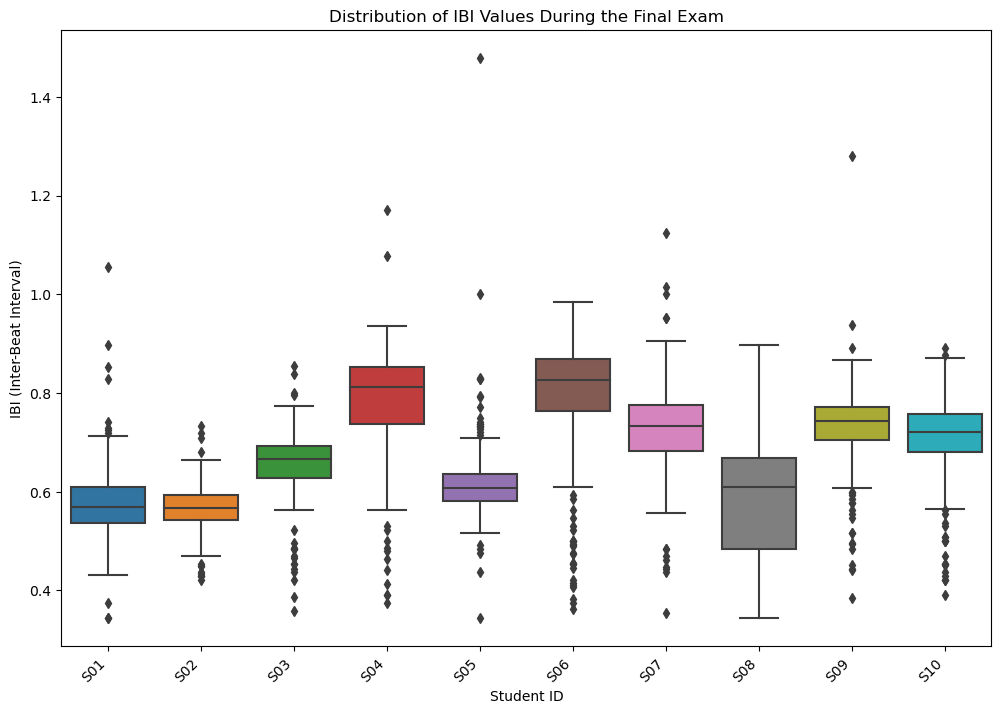

In [5]:
final_exam_data = df_ibi[df_ibi['Exam'] == 'final']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Student_id', y='IBI', data=final_exam_data)
plt.title('Distribution of IBI Values During the Final Exam')
plt.xlabel('Student ID')
plt.ylabel('IBI (Inter-Beat Interval)')
plt.xticks(rotation=45, ha='right') 
plt.show()


# Merge the 'grades' table with the 'HR' table. Calculate the average heart rate for each student during 'midterm 1' and 'midterm 2'. Display the results.

In [6]:
# Merge the 'grades' and 'HR' tables on 'Student_id'
merged_df = pd.merge(df_grades, df_hr, on='Student_id', how='inner')

# Filter data for 'midterm 1' and 'midterm 2'
midterm1_data = merged_df[merged_df['Exam'] == 'Midterm 1']
midterm2_data = merged_df[merged_df['Exam'] == 'Midterm 2']

# Calculate average heart rate for each student during 'midterm 1'
avg_hr_midterm1 = midterm1_data.groupby('Student_id')['HR'].mean().reset_index()
avg_hr_midterm1.rename(columns={'HR': 'Avg_HR_Midterm1'}, inplace=True)

# Calculate average heart rate for each student during 'midterm 2'
avg_hr_midterm2 = midterm2_data.groupby('Student_id')['HR'].mean().reset_index()
avg_hr_midterm2.rename(columns={'HR': 'Avg_HR_Midterm2'}, inplace=True)

# Merge the average heart rate tables
avg_hr_results = pd.merge(avg_hr_midterm1, avg_hr_midterm2, on='Student_id', how='outer')

# Display the results
print(avg_hr_results)


  Student_id  Avg_HR_Midterm1  Avg_HR_Midterm2
0        S01       103.074382       110.940849
1        S02       111.395774       106.640307
2        S03       105.680635        97.320165
3        S04       110.393691        94.793126
4        S05       108.237695       113.366352
5        S06       106.884286       104.584475
6        S07       112.336762        98.938350
7        S08       113.836637       102.485442
8        S09       108.151853       102.971478
9        S10       107.044026       106.774833


# Analyze the average grades for male and female students.

In [8]:
df_merged = pd.merge(df_grades,df_demography, on = ['Student_id'])
df = df_merged.groupby('Gender')[['Midterm 1','Midterm 2','final']].mean()
df

,Midterm 1,Midterm 2,final
Gender,,,
F,78.6,79.6,164.6
M,76.4,60.2,148.8
